# Proyek Analisis Data: BCC Academy Indonesia
- **Nama:** Iwan Kurniawan
- **Jabatan:** Founder & CEO
- **Agenda:** Analisis Data Penjualan Kursus BCB Academy

In [141]:
!pip install pandas==2.2.1 matplotlib==3.8.3 seaborn==0.13.2 streamlit==1.31.1 babel==2.14.0

## Import Semua Packages/Library yang Digunakan

*   pandas==2.2.1
*   matplotlib==3.8.3
*   seaborn==0.13.2
*   streamlit==1.31.1
*   babel==2.14.0




In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from babel.numbers import format_currency
import missingno as msno
import cv2
import numpy as np

## Data Wrangling

### Gathering Data

In [178]:
# Read the CSV file
df = pd.read_csv("https://raw.githubusercontent.com/belajarcarabelajar/data-analisis-bcbacademy/master/data/Update_Until_Maret_2024/all_dataset_Maret_2024.csv?token=GHSAT0AAAAAACOXOBBNZM2TTQJJUE46IJA6ZPQ7T3A", delimiter=';')

# Print the DataFrame
print(df)

            Order Id              Nama Depan   Telepon (Alamat)  \
0    BCB210925000001           Zakia Azzahra   +6281226393303\t   
1    BCB210930000001  Adytia Heriangga Putra   +6282285921786\t   
2    BCB211003000001           Fatiya Izzati  +62895341289950\t   
3    BCB211003000003             Saeful Amin     085223746389\t   
4    BCB211004000004       Susanti Febrianti      08871919095\t   
..               ...                     ...                ...   
723  BCB240217000010                    Nita     081369957252\t   
724  BCB240217000012                   Faldo     085834196942\t   
725  BCB240217000013                    Kodi     085643152920\t   
726  BCB240223000001              Agustinaja     085817688542\t   
727  BCB240227000001                    Agoy     082134735963\t   

                               Email        Provinsi  \
0         zakiaazzahra1703@gmail.com     Jawa Tengah   
1          adytiaheriangga@gmail.com  Sumatera Barat   
2           fatiyaizzati12@

### Assessing Data

In [179]:
# Display the first few rows of the dataframe with the correct structure
df.head()

,Order Id,Nama Depan,Telepon (Alamat),Email,Provinsi,Nama Produk,Total,Pembayaran dari Bank,Waktu Dibuat,URL Landasan,Sumber
0,BCB210925000001,Zakia Azzahra,+6281226393303\t,zakiaazzahra1703@gmail.com,Jawa Tengah,Ebook Belajar Cara Belajar [1],69003,DANA,25/09/2021 21:03,/,NaN
1,BCB210930000001,Adytia Heriangga Putra,+6282285921786\t,adytiaheriangga@gmail.com,Sumatera Barat,Ebook Belajar Cara Belajar [1],69095,OVO,30/09/2021 18:02,/ebook,NaN
2,BCB211003000001,Fatiya Izzati,+62895341289950\t,fatiyaizzati12@gmail.com,Yogyakarta,Ebook Belajar Cara Belajar [1],0,NaN,03/10/2021 11:36,/ebook,-
3,BCB211003000003,Saeful Amin,085223746389\t,saeful_amin@stikes-bth.ac.id,Jawa Barat,Ebook Belajar Cara Belajar [1],69110,BSI,03/10/2021 18:22,/bio,l.instagram.com
4,BCB211004000004,Susanti Febrianti,08871919095\t,susantifebrianti852@gmail.com,Jawa Barat,Ebook Belajar Cara Belajar [1],50046,DANA,04/10/2021 08:37,/blog/kalo-tipe-gaya-belajar-kamu-yang-mana,belajarcarabelajar.typeform.com/Test-VARK


### Cleaning Data

In [147]:
any_missing = df.isnull().values.any()
print(any_missing)  # Prints True if any missing values exist

True


In [148]:
print(df.isnull().sum())  # Prints missing value counts for all columns

Order Id                  0
Nama Depan                2
Telepon (Alamat)          2
Email                     0
Provinsi                  2
Nama Produk               0
Total                     0
Pembayaran dari Bank    159
Waktu Dibuat              0
URL Landasan            186
Sumber                  188
dtype: int64


In [150]:
df_cleaned = df.dropna()  # Drops rows with any missing values

In [151]:
df_cleaned = df.dropna(axis=1)  # Drops columns with any missing values

In [152]:
# Check for missing values (refer to previous explanation)
missing_values = df.isnull().sum()
print(missing_values)

Order Id                  0
Nama Depan                2
Telepon (Alamat)          2
Email                     0
Provinsi                  2
Nama Produk               0
Total                     0
Pembayaran dari Bank    159
Waktu Dibuat              0
URL Landasan            186
Sumber                  188
dtype: int64


In [153]:
# Fill missing values in "Pembayaran dari Bank" column with "Unknown"
df['Pembayaran dari Bank'] = df['Pembayaran dari Bank'].fillna('Unknown')

# Now, let's check again for missing values in the dataset
print(df.isnull().sum())

# Continue with your analysis or further data preprocessing...

Order Id                  0
Nama Depan                2
Telepon (Alamat)          2
Email                     0
Provinsi                  2
Nama Produk               0
Total                     0
Pembayaran dari Bank      0
Waktu Dibuat              0
URL Landasan            186
Sumber                  188
dtype: int64


In [154]:
# Check for rows with missing values in "Nama Depan", "Telepon (Alamat)", and "Provinsi" columns
missing_rows = df[df["Nama Depan"].isnull() | df["Telepon (Alamat)"].isnull() | df["Provinsi"].isnull()]

# Display rows with missing values in those columns
missing_rows

,Order Id,Nama Depan,Telepon (Alamat),Email,Provinsi,Nama Produk,Total,Pembayaran dari Bank,Waktu Dibuat,URL Landasan,Sumber
280,BCB221001000003,NaN,NaN,derisatria32ds@gmail.com,NaN,Ebook Belajar Cara Belajar [1],99099,BRI,01/10/2022 23:02,/ebook,-
281,BCB221002000001,NaN,NaN,kentfrumentius@gmail.com,NaN,Ebook Belajar Cara Belajar [1],99059,BCA,02/10/2022 22:06,NaN,NaN


In [155]:
# Assuming there might be empty strings or similar, explicitly replacing them with NaN
# This is just a precautionary step, as missing values are already NaN
df['Nama Depan'] = df['Nama Depan'].replace('', np.nan)
df['Telepon (Alamat)'] = df['Telepon (Alamat)'].replace('', np.nan)
df['Provinsi'] = df['Provinsi'].replace('', np.nan)

# Display the rows to verify the operation, focusing on previously identified missing rows
df.loc[[280, 281]]

,Order Id,Nama Depan,Telepon (Alamat),Email,Provinsi,Nama Produk,Total,Pembayaran dari Bank,Waktu Dibuat,URL Landasan,Sumber
280,BCB221001000003,NaN,NaN,derisatria32ds@gmail.com,NaN,Ebook Belajar Cara Belajar [1],99099,BRI,01/10/2022 23:02,/ebook,-
281,BCB221002000001,NaN,NaN,kentfrumentius@gmail.com,NaN,Ebook Belajar Cara Belajar [1],99059,BCA,02/10/2022 22:06,NaN,NaN


In [156]:
# Menghitung jumlah nilai kosong di kolom tertentu setelah penggantian nilai
jumlah_nilai_kosong = df[['Nama Depan', 'Telepon (Alamat)', 'Provinsi']].isnull().sum()

# Menampilkan jumlah nilai kosong untuk verifikasi
print(jumlah_nilai_kosong)

Nama Depan          2
Telepon (Alamat)    2
Provinsi            2
dtype: int64


In [157]:
df = df.drop(df.columns[-1], axis=1)

In [158]:
print(df.isnull().sum())

Order Id                  0
Nama Depan                2
Telepon (Alamat)          2
Email                     0
Provinsi                  2
Nama Produk               0
Total                     0
Pembayaran dari Bank      0
Waktu Dibuat              0
URL Landasan            186
dtype: int64


In [160]:
# Mengganti semua nilai NaN di seluruh DataFrame dengan Unknown
df.fillna(0, inplace=True)

# Verifikasi dengan menampilkan jumlah nilai kosong kembali
jumlah_nilai_kosong_setelah = df.isnull().sum()
print(jumlah_nilai_kosong_setelah)

Order Id                0
Nama Depan              0
Telepon (Alamat)        0
Email                   0
Provinsi                0
Nama Produk             0
Total                   0
Pembayaran dari Bank    0
Waktu Dibuat            0
URL Landasan            0
dtype: int64


In [161]:
# Display the first few rows of the updated dataframe to show the changes
df.head()

,Order Id,Nama Depan,Telepon (Alamat),Email,Provinsi,Nama Produk,Total,Pembayaran dari Bank,Waktu Dibuat,URL Landasan
0,BCB210925000001,Zakia Azzahra,+6281226393303\t,zakiaazzahra1703@gmail.com,Jawa Tengah,Ebook Belajar Cara Belajar [1],69003,DANA,25/09/2021 21:03,/
1,BCB210930000001,Adytia Heriangga Putra,+6282285921786\t,adytiaheriangga@gmail.com,Sumatera Barat,Ebook Belajar Cara Belajar [1],69095,OVO,30/09/2021 18:02,/ebook
2,BCB211003000001,Fatiya Izzati,+62895341289950\t,fatiyaizzati12@gmail.com,Yogyakarta,Ebook Belajar Cara Belajar [1],0,Unknown,03/10/2021 11:36,/ebook
3,BCB211003000003,Saeful Amin,085223746389\t,saeful_amin@stikes-bth.ac.id,Jawa Barat,Ebook Belajar Cara Belajar [1],69110,BSI,03/10/2021 18:22,/bio
4,BCB211004000004,Susanti Febrianti,08871919095\t,susantifebrianti852@gmail.com,Jawa Barat,Ebook Belajar Cara Belajar [1],50046,DANA,04/10/2021 08:37,/blog/kalo-tipe-gaya-belajar-kamu-yang-mana


In [162]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Handle duplicates (optional)
if duplicates > 0:
    print("\nHandling duplicates:")

    # Option 1: Drop duplicate rows (all columns must be identical)
    df_no_duplicates = df.drop_duplicates()
    print("Dataframe after dropping duplicates (Option 1):")
    print(df_no_duplicates.head())

    # Option 2: Keep only the first occurrence (consider sorting beforehand)
    df_unique_first = df.loc[~df.duplicated(keep='first')]
    print("\nDataframe after keeping only the first occurrence (Option 2):")
    print(df_unique_first.head())

    # Additional options: modify or aggregate duplicates based on your needs



Number of duplicate rows: 0


## Exploratory Data Analysis (EDA)

In [163]:
# Menentukan teks lama dan teks baru
teks_lama = ["Ebook Belajar Cara Belajar", "Virtual Course BCB Academy"]
teks_baru = ["Ebook Belajar Cara Belajar [1]", "Virtual Course BCB Academy."]

# Mengganti teks pada kolom 'Nama Produk'
for i in range(len(teks_lama)):
    df['Nama Produk'] = df['Nama Produk'].replace(teks_lama[i], teks_baru[i])

In [164]:
# Simpan file CSV ke direktori yang bisa diakses
df.to_csv("drive/MyDrive/Data Analysis BCB/data/all_dataset_Maret_2024.csv")

# Print the DataFrame
print(df.head())

          Order Id              Nama Depan   Telepon (Alamat)  \
0  BCB210925000001           Zakia Azzahra   +6281226393303\t   
1  BCB210930000001  Adytia Heriangga Putra   +6282285921786\t   
2  BCB211003000001           Fatiya Izzati  +62895341289950\t   
3  BCB211003000003             Saeful Amin     085223746389\t   
4  BCB211004000004       Susanti Febrianti      08871919095\t   

                           Email        Provinsi  \
0     zakiaazzahra1703@gmail.com     Jawa Tengah   
1      adytiaheriangga@gmail.com  Sumatera Barat   
2       fatiyaizzati12@gmail.com      Yogyakarta   
3   saeful_amin@stikes-bth.ac.id      Jawa Barat   
4  susantifebrianti852@gmail.com      Jawa Barat   

                      Nama Produk  Total Pembayaran dari Bank  \
0  Ebook Belajar Cara Belajar [1]  69003                 DANA   
1  Ebook Belajar Cara Belajar [1]  69095                  OVO   
2  Ebook Belajar Cara Belajar [1]      0              Unknown   
3  Ebook Belajar Cara Belajar [1]  6

## Visualization & Explanatory Analysis

<ipython-input-165-def5c6f9f79e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=order_counts.index, y=order_counts.values, palette="viridis")


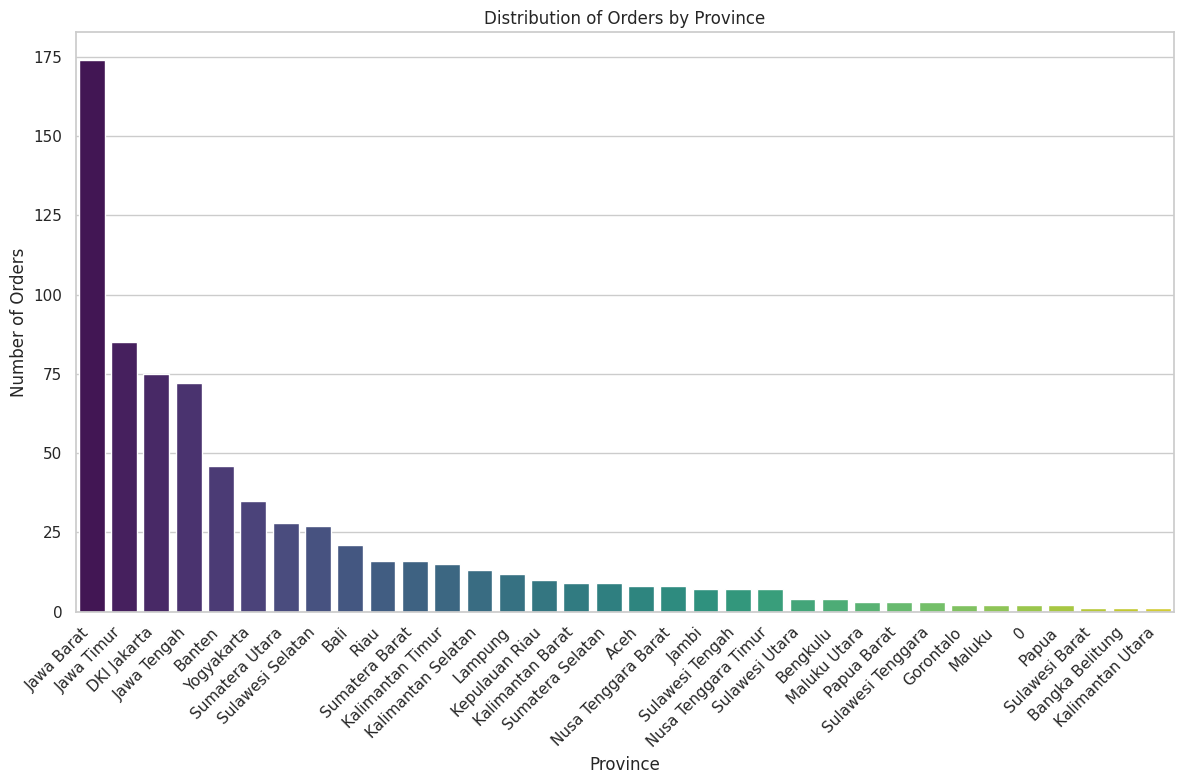

In [165]:
# Set visualization styles
sns.set(style="whitegrid")

# Visualization 1: Distribution of Orders by Province
plt.figure(figsize=(12, 8))
order_counts = df['Provinsi'].value_counts()
sns.barplot(x=order_counts.index, y=order_counts.values, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title('Distribution of Orders by Province')
plt.xlabel('Province')
plt.ylabel('Number of Orders')
plt.tight_layout()

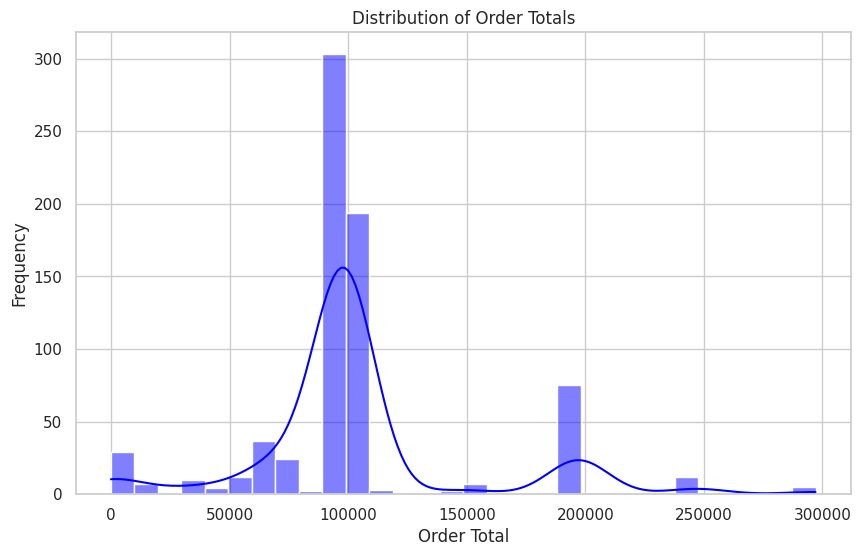

In [166]:
# Convert 'Total' to numeric, errors='coerce' will set invalid parsing to NaN
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')

# Visualization 3: Order Total Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Total'], bins=30, kde=True, color='blue')
plt.title('Distribution of Order Totals')
plt.xlabel('Order Total')
plt.ylabel('Frequency')
plt.show()

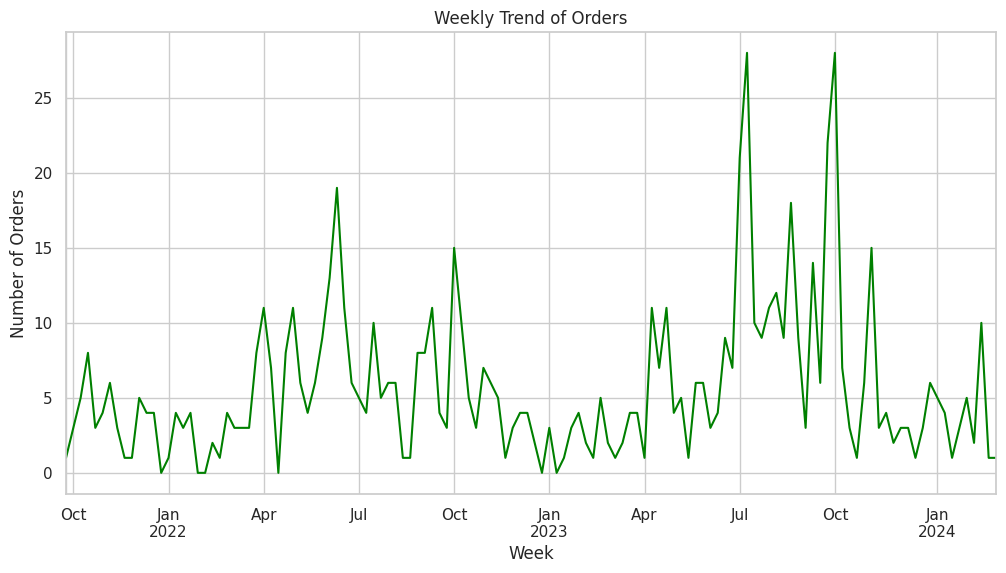

In [167]:
# Convert 'Waktu Dibuat' to datetime
df['Waktu Dibuat'] = pd.to_datetime(df['Waktu Dibuat'], errors='coerce', dayfirst=True)

# Set 'Waktu Dibuat' as the index
df_time_series = df.set_index('Waktu Dibuat')

# Resample data to weekly counts of orders
weekly_orders = df_time_series.resample('W').size()

# Visualization 4: Time Series of Orders
plt.figure(figsize=(12, 6))
weekly_orders.plot(color='green')
plt.title('Weekly Trend of Orders')
plt.xlabel('Week')
plt.ylabel('Number of Orders')
plt.show()

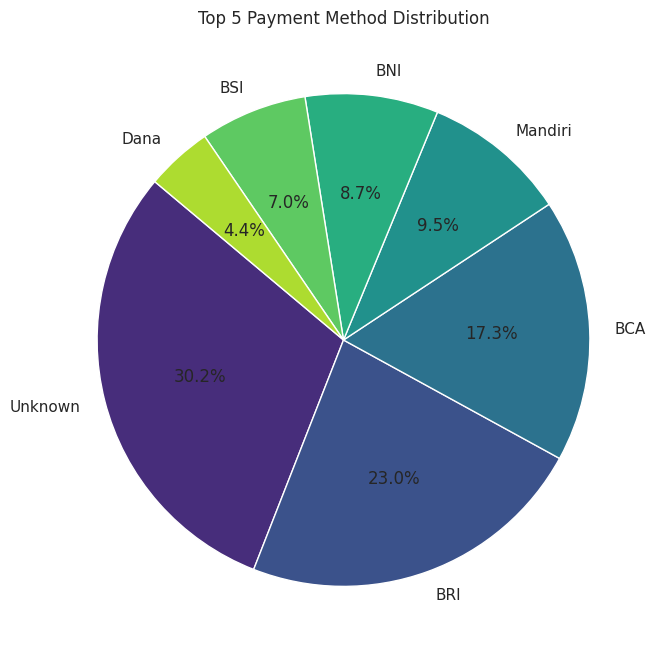

In [169]:
# Get the top 5 payment methods
top_5_payment_methods = df['Pembayaran dari Bank'].value_counts().head(7)

# Visualization 2: Top 5 Payment Method Distribution
plt.figure(figsize=(8, 8))
plt.pie(top_5_payment_methods, labels=top_5_payment_methods.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(top_5_payment_methods)))
plt.title('Top 5 Payment Method Distribution')

plt.show()

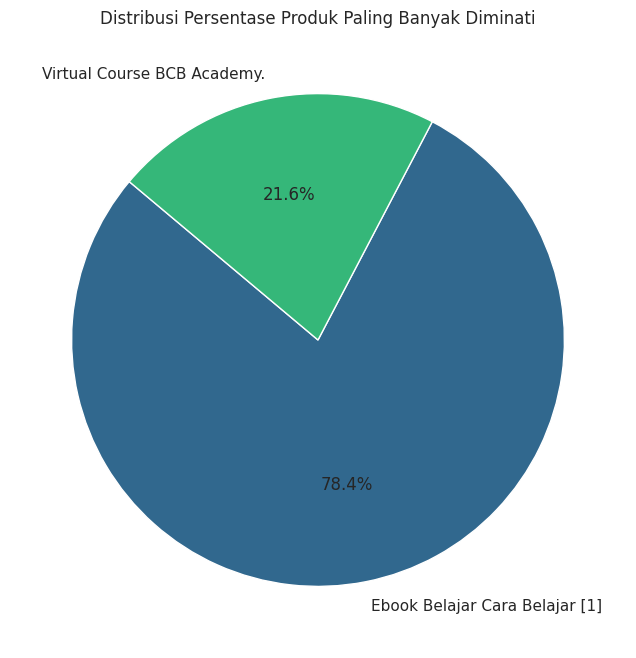

In [170]:
# Menghitung jumlah order untuk setiap produk
product_counts = df['Nama Produk'].value_counts()

# Membuat pie chart untuk menampilkan persentase produk paling banyak diminati
plt.figure(figsize=(10, 8))
plt.pie(product_counts, labels=product_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(product_counts)))
plt.title('Distribusi Persentase Produk Paling Banyak Diminati')

plt.show()

<ipython-input-171-531d030618d9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_urls.index, y=top_5_urls.values, palette="viridis")


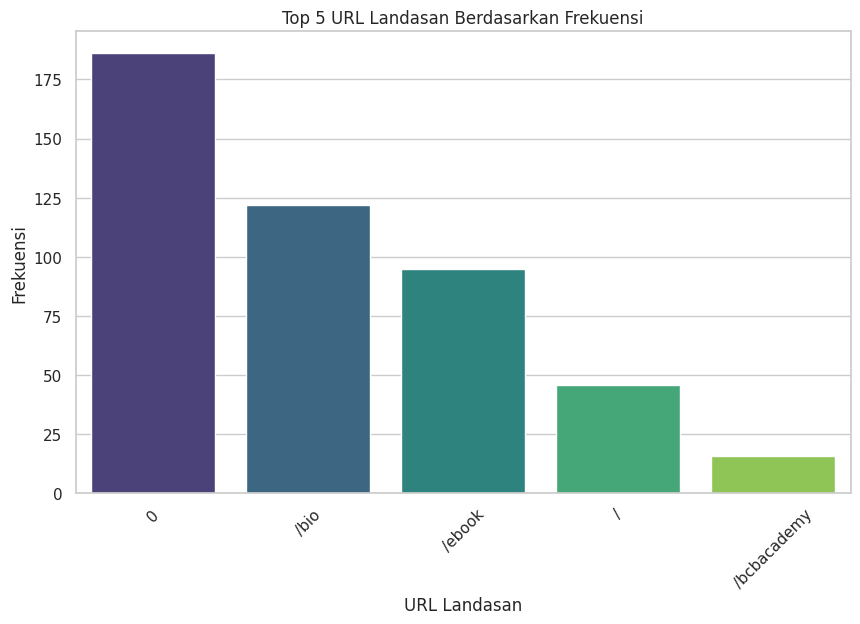

In [171]:
# Mengambil 5 URL teratas berdasarkan frekuensi
top_5_urls = df['URL Landasan'].value_counts().head(5)

# Membuat bar chart untuk 5 URL teratas
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_urls.index, y=top_5_urls.values, palette="viridis")
plt.title('Top 5 URL Landasan Berdasarkan Frekuensi')
plt.xlabel('URL Landasan')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.show()


## Conclusion

## Persiapan unggah file CSV

In [175]:
df.to_csv("dataset_new_final.csv", index=False)

In [176]:
# Menyimpan DataFrame ke file CSV
df.to_csv('dataset_new_final.csv', index=False)

# Menggunakan Google Colab untuk mengunduh file ke komputer lokal Anda
from google.colab import files
files.download('dataset_new_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>